In [0]:

# !unzip "/content/drive/My Drive/dataset/dog-breed-identification.zip"


In [0]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [0]:
#!unzip  '/content/gdrive/My Drive/stanford-dogs-dataset-traintest' -d '/content/gdrive/My Drive/stanford-dogs'

In [0]:
#!unzip "/content/drive/My Drive/dataset/dog-breed-identification.zip"


In [0]:
import os
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.optimizers import Adam,SGD
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from tqdm import tqdm  
import cv2
import random
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [0]:
black_and_tan_coonhound_dir = '/content/drive/My Drive/extracted-destination/stanford_dataset/n02089078-black-and-tan_coonhound'
english_foxhound_dir='/content/drive/My Drive/extracted-destination/stanford_dataset/n02089973-English_foxhound'
pom_dir='/content/drive/My Drive/extracted-destination/stanford_dataset/n02112018-Pomeranian'

In [0]:
directory_list = list()
directory_path_list=list()
prediction_class=list()
for root, dirs, files in os.walk("/content/drive/My Drive/extracted-destination/stanford_dataset", topdown=False):
    directory_path_list.append(root)
    for name in dirs:
        prediction_class.append('-'.join(os.path.join(name).split('-')[1:]))
        directory_list.append(os.path.join(name))
        
directory_path_list=directory_path_list[:-1]
print (directory_list)
print(directory_path_list)
print(prediction_class)
# temp = class_name.split(splt_char) 
# res =  splt_char.join(temp[1:]) 

['n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02110958-pug', 'n02112018-Pomeranian', 'n02096585-Boston_bull', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02090721-Irish_wolfhound', 'n02090379-redbone', 'n02090622-borzoi']
['/content/drive/My Drive/extracted-destination/stanford_dataset/n02089078-black-and-tan_coonhound', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02089867-Walker_hound', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02089973-English_foxhound', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02110958-pug', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02112018-Pomeranian', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02096585-Boston_bull', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02099601-golden_retriever', '/content/drive/My Drive/extracted-destination/stanford_dataset/n02099712-Lab

In [0]:
# train_datagen = ImageDataGenerator(rescale=1./255)

# # Flow training images in batches of 128 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(
#         '/content/drive/My Drive/extracted-destination/stanford_dataset',  # This is the source directory for training images
#         target_size=(400, 400),  # All images will be resized to 200 x 200
#         batch_size=32,
#         # Specify the classes explicitly
#         classes = directory_list,
#         # Since we use categorical_crossentropy loss, we need categorical labels
#         class_mode='categorical')


Found 1908 images belonging to 11 classes.


In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    print("PRINTING FROM THE FUNCTION", label,data_dir)
    #print(label,data_dir)
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        try:
          path=os.path.join(data_dir,img)
          img = cv2.imread(path,cv2.IMREAD_COLOR)
          img = cv2.resize(img,(400,400))
          X.append(np.array(img))
          Z.append(str(label))
        except Exception as e:
          pass

In [0]:
X = []
Z = []

for x in range(len(directory_list)):
  #print(directory_list[x],directory_path_list[x])
  training_data(directory_list[x],directory_path_list[x])
  print()

In [0]:
print(Z)

['n02090622-borzoi', 'n02099601-golden_retriever', 'n02089867-Walker_hound', 'n02089078-black-and-tan_coonhound', 'n02112018-Pomeranian', 'n02096585-Boston_bull', 'n02090379-redbone', 'n02089867-Walker_hound', 'n02099601-golden_retriever', 'n02090721-Irish_wolfhound', 'n02089078-black-and-tan_coonhound', 'n02112018-Pomeranian', 'n02110958-pug', 'n02099601-golden_retriever', 'n02096585-Boston_bull', 'n02110958-pug', 'n02089078-black-and-tan_coonhound', 'n02089078-black-and-tan_coonhound', 'n02096585-Boston_bull', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02110958-pug', 'n02096585-Boston_bull', 'n02099712-Labrador_retriever', 'n02090379-redbone', 'n02089078-black-and-tan_coonhound', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02112018-Pomeranian', 'n02099712-Labrador_retriever', 'n02110958-pug', 'n02090721-Irish_wolfhound', 'n02090622-borzoi', 'n02090379-redbone', 'n02090379-redbone', 'n02089867-Walker_hound', 'n02089867-Walker_hound', 'n02110958-pug', 'n0208

In [0]:
X = np.array(X)
X=X/255

In [0]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
S = label_encoder.inverse_transform(Y)
# final = to_categorical(Y)
# x_train,x_test,y_train,y_test = train_test_split(X,final,test_size=0.15,random_state=42)

In [0]:
ma = label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10])
ma

array(['n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound',
       'n02089973-English_foxhound', 'n02090379-redbone',
       'n02090622-borzoi', 'n02090721-Irish_wolfhound',
       'n02096585-Boston_bull', 'n02099601-golden_retriever',
       'n02099712-Labrador_retriever', 'n02110958-pug',
       'n02112018-Pomeranian'], dtype='<U33')

In [0]:
a = X[537]
b = S[537]
plt.imshow(a)
plt.show()
print(b)
print(prediction_class)

In [0]:
Y

In [0]:
#type(X)
print(X[0])

In [0]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)                                

# augs_gen.fit(x_train)
# test_datagen.fit(x_test)


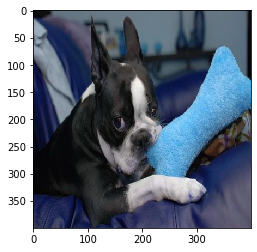

n02089078-black-and-tan_coonhound


In [0]:
a = x_train[200]
b = y_train[200]
plt.imshow(a)
plt.show()
print(Z[np.argmax(b)])

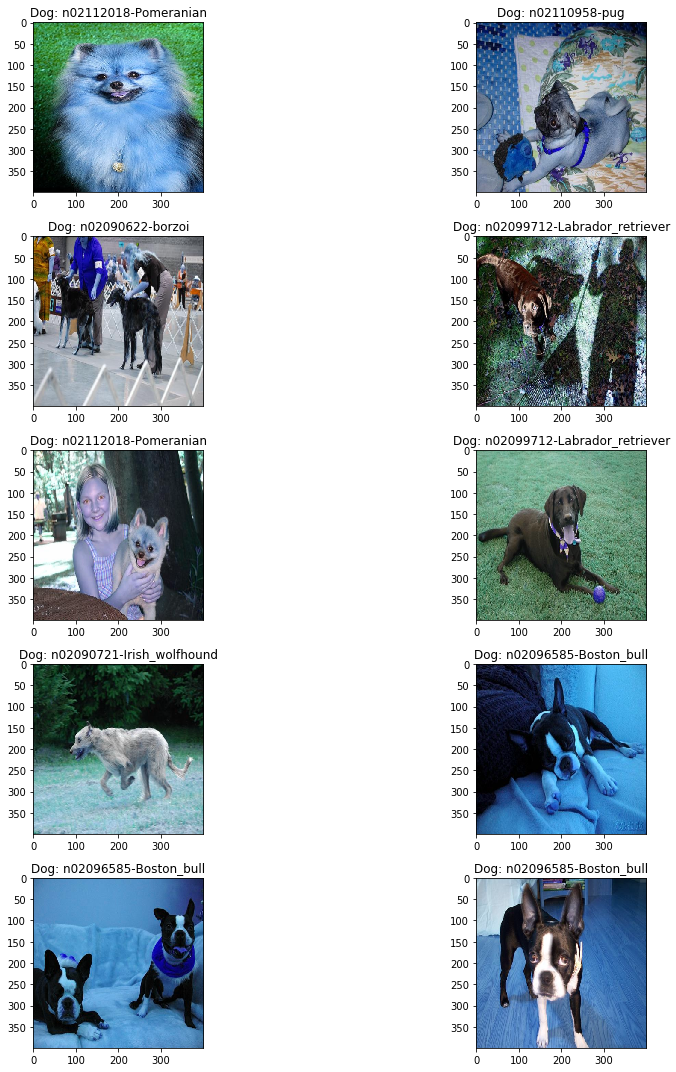

In [0]:
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[0[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [0]:
def create_model():
  base_model = VGG16(include_top=False,
                  input_shape = (400,400,3),
                  weights = 'imagenet')

  for layer in base_model.layers:
    layer.trainable = False
    
  for layer in base_model.layers:
    print(layer,layer.trainable)

  model = Sequential()
  model.add(base_model)
  model.add(GlobalAveragePooling2D())
  #model.add(Dropout(0.5))
  model.add(Dense(1024,activation='relu'))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(11,activation='softmax'))
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
  return model

model=create_model()











<keras.engine.input_layer.InputLayer object at 0x7f934700b048> False
<keras.layers.convolutional.Conv2D object at 0x7f9347058d30> False
<keras.layers.convolutional.Conv2D object at 0x7f934700b550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f934701d208> False
<keras.layers.convolutional.Conv2D object at 0x7f9347028940> False
<keras.layers.convolutional.Conv2D object at 0x7f934702dd30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9347031cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f93467b89b0> False
<keras.layers.convolutional.Conv2D object at 0x7f93467c01d0> False
<keras.layers.convolutional.Conv2D object at 0x7f93467c5588> False
<keras.layers.pooling.MaxPooling2D object at 0x7f93467cb6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f93467d7898> False
<keras.layers.convolutional.Conv2D object at 0x7f93467d7eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f93467e5550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9

In [0]:
checkpoint = ModelCheckpoint(
    '/content/drive/My Drive/Colab Notebooks/base_VGG16_new_random30_tuesday.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "/content/drive/My Drive/Colab Notebooks/training_VGG16_csv_random30_tuesday.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [0]:
print(x_train.shape[0])

1621


Epoch 1/30
50/50 [==============================] - 56s 1s/step - loss: 0.4894 - acc: 0.8318 - val_loss: 0.6719 - val_acc: 0.7840

Epoch 00001: val_loss improved from inf to 0.67191, saving model to /content/drive/My Drive/Colab Notebooks/base_VGG16_new_random30_tuesday.model
Epoch 2/30
50/50 [==============================] - 55s 1s/step - loss: 0.4944 - acc: 0.8237 - val_loss: 0.6623 - val_acc: 0.7770

Epoch 00002: val_loss improved from 0.67191 to 0.66234, saving model to /content/drive/My Drive/Colab Notebooks/base_VGG16_new_random30_tuesday.model
Epoch 3/30
50/50 [==============================] - 53s 1s/step - loss: 0.4724 - acc: 0.8406 - val_loss: 0.6668 - val_acc: 0.7840

Epoch 00003: val_loss did not improve from 0.66234
Epoch 4/30
50/50 [==============================] - 54s 1s/step - loss: 0.4848 - acc: 0.8384 - val_loss: 0.6693 - val_acc: 0.7735

Epoch 00004: val_loss did not improve from 0.66234
Epoch 5/30
50/50 [==============================] - 52s 1s/step - loss: 0.4804

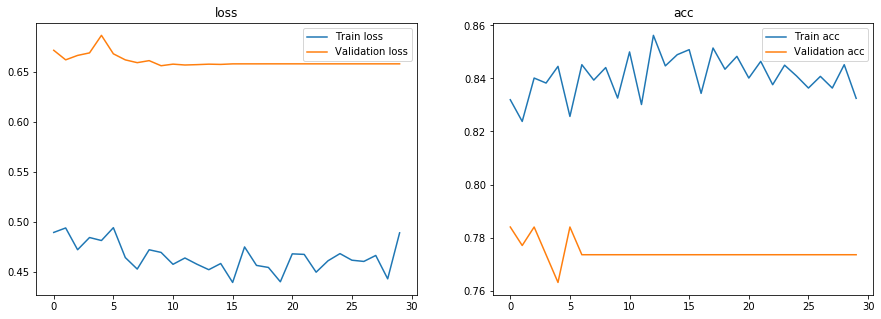

In [0]:

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=32),
    validation_data  = (x_test,y_test),
    validation_steps = 281//32,
    steps_per_epoch  = 50,
    epochs = 30, 
    verbose = 1,
    callbacks=callbacks
)
model.save('/content/drive/My Drive/Colab Notebooks/trained_model/model_new_tuesday30_random.model')
show_final_history(history)
model.load_weights('/content/drive/My Drive/Colab Notebooks/base_VGG16_new_random30_tuesday.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/trained_model/model_VGG16_new_random30_tuesday.json","w") as json_file:
    json_file.write(model_json)
    
#model.save("model_VGG16_new.h5")
# print("Weights Saved")

In [0]:
file="/content/drive/My Drive/extracted-destination/stanford_dataset/n02090721-Irish_wolfhound/n02090721_1003.jpg"
examples=[]
img = cv2.imread(file,cv2.IMREAD_COLOR)
img=cv2.resize(img,(400,400))
examples.append(img)
examples=np.array(examples)
img.shape,examples.shape

((400, 400, 3), (1, 400, 400, 3))

In [0]:
trained_model=tf.keras.models.load_model(
    '/content/drive/My Drive/Colab Notebooks/trained_model/model20_new_tuesday_random.model',
)
prediction=trained_model.predict(examples)
print(prediction)
print(np.argmax(prediction))
print(prediction_class)

pred_name = ma[np.argmax(prediction)]
print(pred_name)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
5
['black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'pug', 'Pomeranian', 'Boston_bull', 'golden_retriever', 'Labrador_retriever', 'Irish_wolfhound', 'redbone', 'borzoi']
n02090721-Irish_wolfhound
